# DT2470 Lab 01: Teh Signal Processings

by Bob L. T. Sturm

In this first lab you will practice some fundamental concepts of signal processing. You will analyse a chosen sampled sound in the time-, frequency-, and time-frequency domains. You will write something intelligent about your analysis, observing things like periodicity, frequency content, harmonicity, etc. You will also learn to extract low-level features from audio and music signals. In the next lab, you will use these features for some machine learning madness.

The lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., python, MATLAB, Processing, C++, etc. But I give tips below in python. Here's some helpful links as well:

- [Numpy API](https://docs.scipy.org/doc/numpy-1.13.0/index.html)
- [Scikit-learn API](https://scikit-learn.org/stable/)
- [MatPlotlib API](https://matplotlib.org/3.1.1/api/index.html)
- [Numpy Cheat Sheet](https://www.dataquest.io/blog/numpy-cheat-sheet/)
- [Pydub API](https://github.com/jiaaro/pydub/blob/master/API.markdown)

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.

# Part 1: Basics

1. Choose an audio file to work with from http://bbcsfx.acropolis.org.uk. Download it, load it using pydub (see [pydub.AudioSegment](https://github.com/jiaaro/pydub/blob/master/API.markdown)), and plot a portion of the waveform with the appropriate axes labeled "Amplitude" and "Time (s)". The time axis **must be** in seconds. (Use the sample rate of your soundfile to find that.) If your audio file has more than one channel, just look at one channel.

> Below is the first 10 seconds of my selected audio waveform. Yours should appear nearly as beautiful.
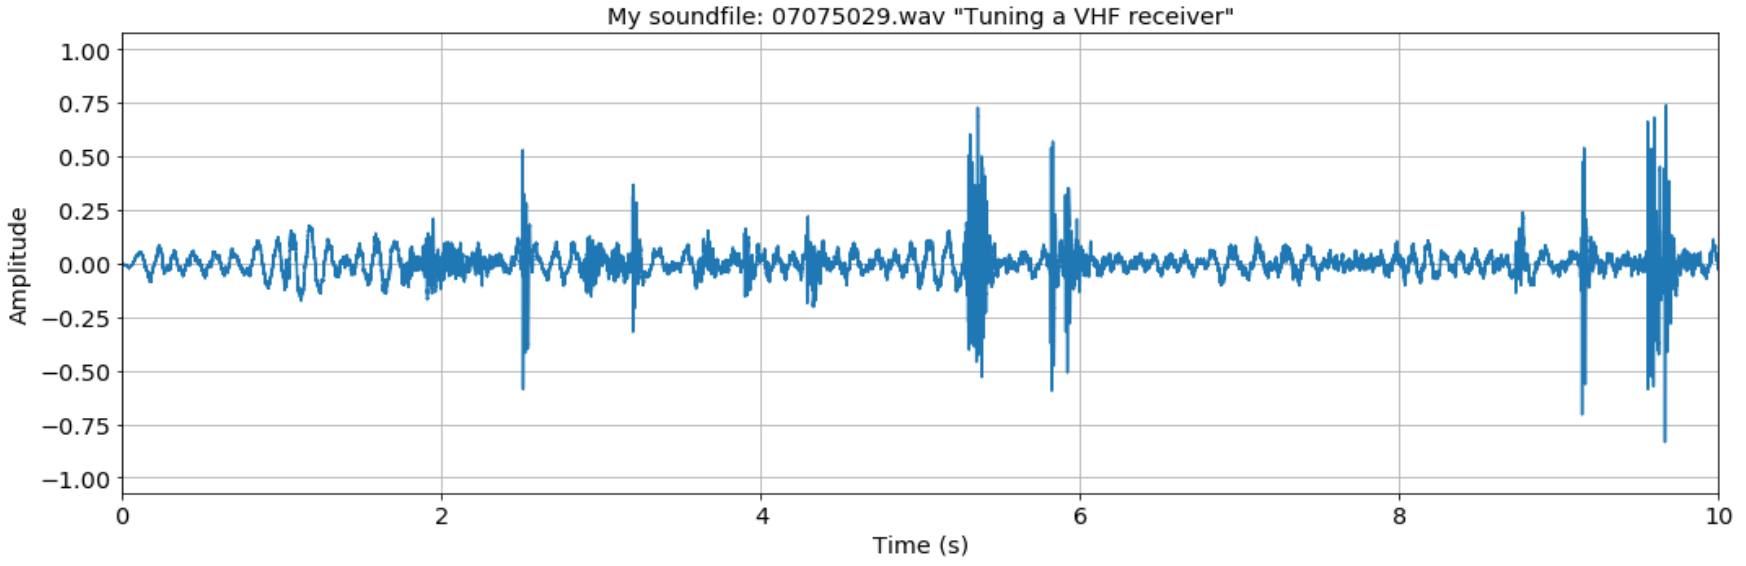

In [1]:
# Here is a how I download an audio file - Does not work anymore, BBC changed the download mode
# So we download the audio file manually

# from urllib import request
# remote_url = 'https://sound-effects.bbcrewind.co.uk/search?q=NHU05018179' # does not work either
# local_file = 'rainforest_sound.wav'
# request.urlretrieve(remote_url, local_file)

In [2]:
# Now we plot the entire audio file
import matplotlib.pyplot as plt
import numpy as np

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# add your code below
# Importing the audiofile
# We used this sound from BBC sound effects: https://sound-effects.bbcrewind.co.uk/search?q=NHU05018179
from pydub import AudioSegment
sound1 = AudioSegment.from_file("rainforest_sound.wav", format="wav")
sound1 = sound1.split_to_mono()[0]

In [3]:
#Getting sample rate and samples
sample_rate = sound1.frame_rate
duration = sound1.duration_seconds
samples = sound1.get_array_of_samples()
    
number_samples = sample_rate * 10    # number of samples in 10 seconds

samples_10_seconds = samples[:number_samples]

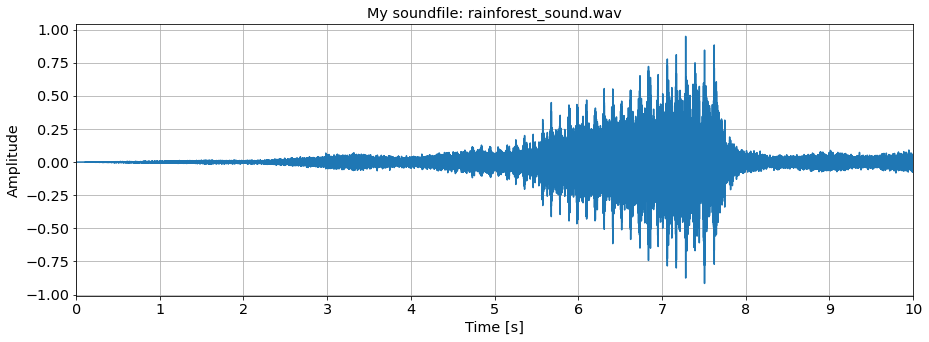

In [4]:
x_values = [sample_rate*i for i in range(11)]
x_labels = [i for i in range(11)]

#normalized samples
y = [samples_10_seconds[i]/10000.0 for i in range(len(samples_10_seconds))]
plt.plot(y)

plt.xticks(x_values, x_labels)

plt.xlim(0, sample_rate*10)

plt.title('My soundfile: rainforest_sound.wav')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()


2. With the audio file you have chosen, zoom into two different 100 ms portions that have audio data and plot them. 

>Below is what mine looks like. We can see the sound appears quite different at both times. At  about 2500 ms we see a sudden rise that decays and oscillates. At about 26 s we see a noisy waveform that has a small amplitude. 

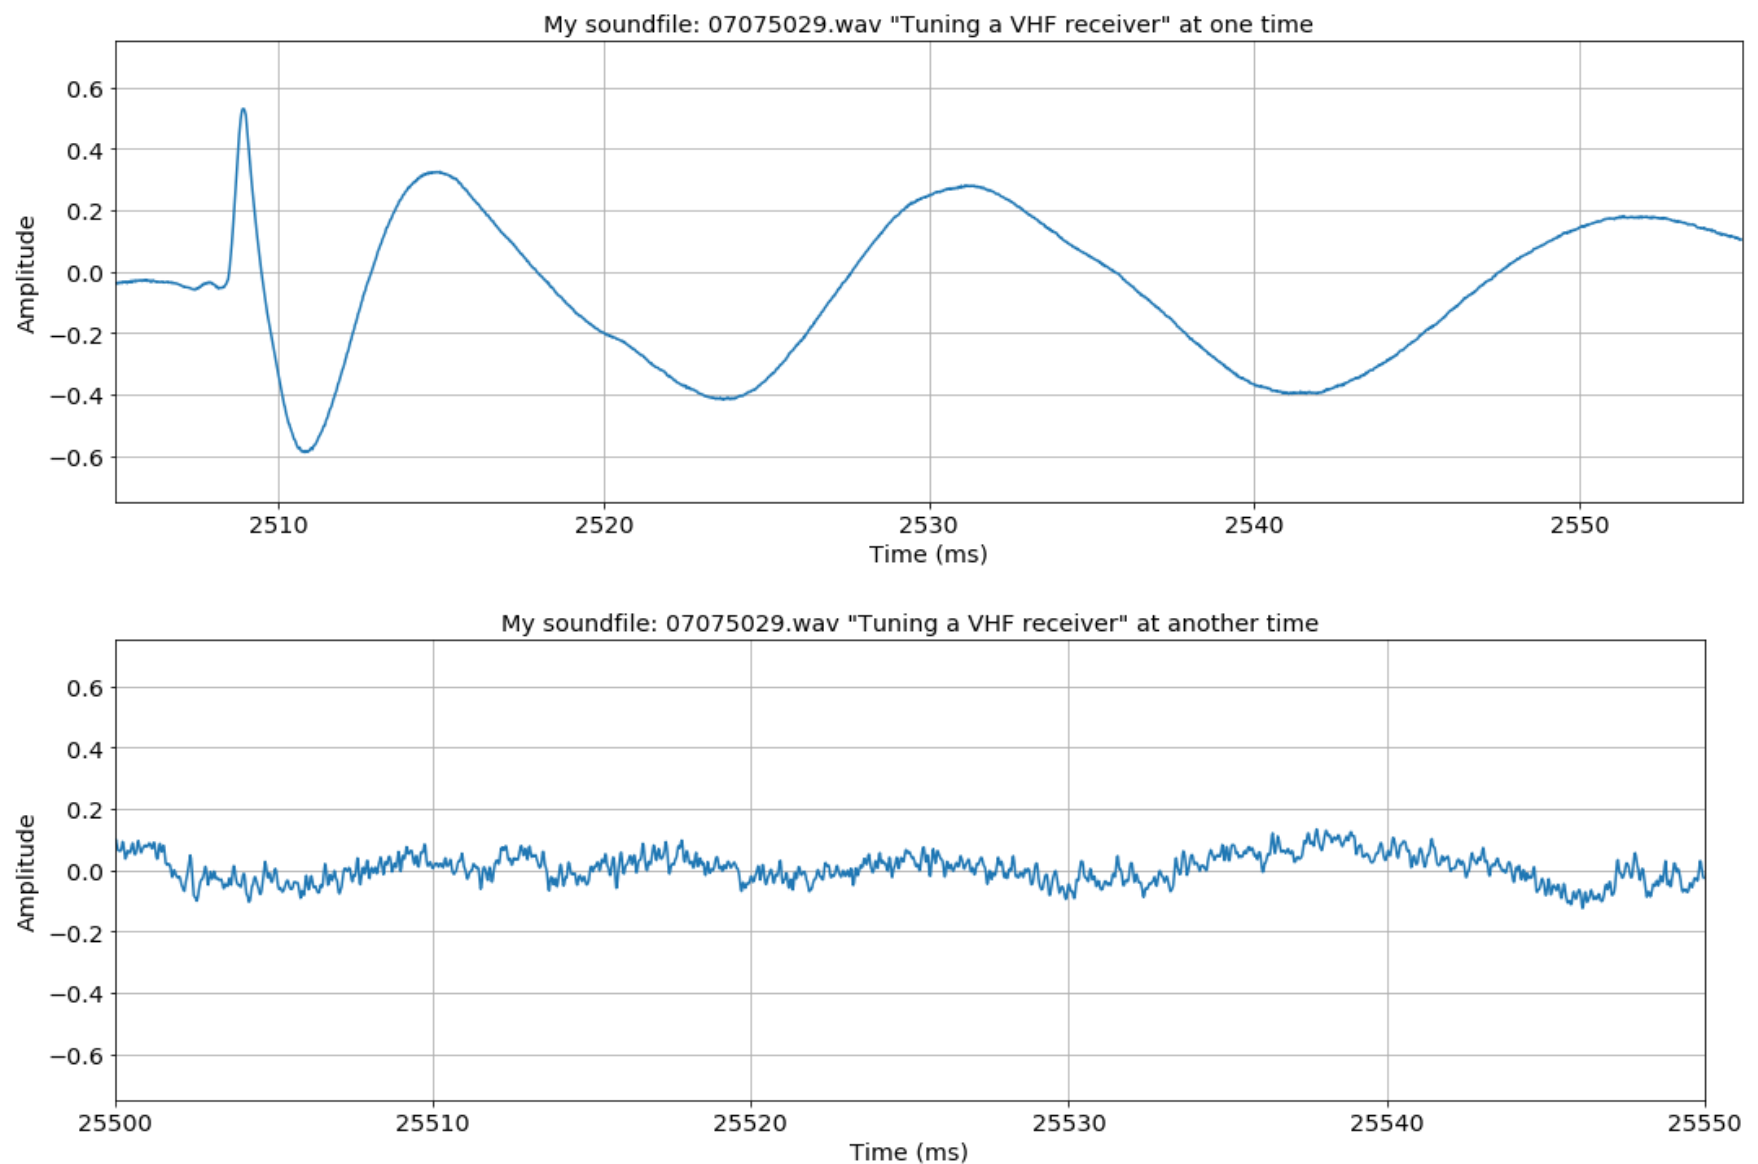

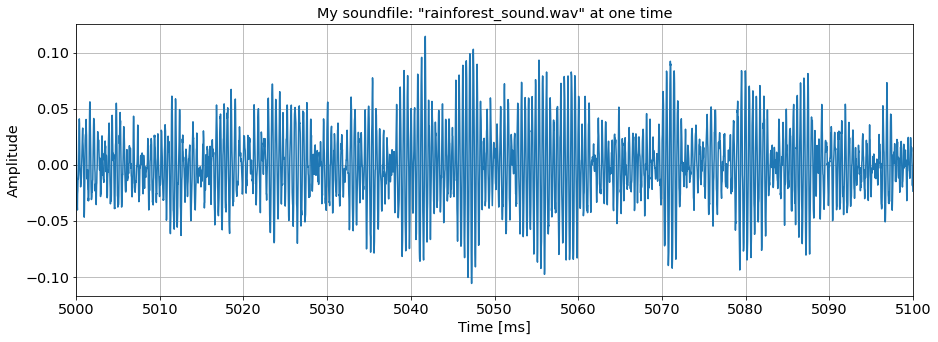

In [5]:
# add your code below

# We choose from 5s and 7s

start1 = sample_rate * 5
end1 = int(start1 + sample_rate/10)

samples_100ms_1 = samples[start1:end1]
y_1 = [samples_100ms_1[i]/10000.0 for i in range(len(samples_100ms_1))]
plt.plot(y_1)

x1_values = [sample_rate/100*i for i in range(11)]
x1_labels = [5000+(10*i) for i in range(11)]
plt.xticks(x1_values, x1_labels)
plt.xlim(0, sample_rate/10)

plt.title('My soundfile: "rainforest_sound.wav" at one time')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.grid()

308700 313110


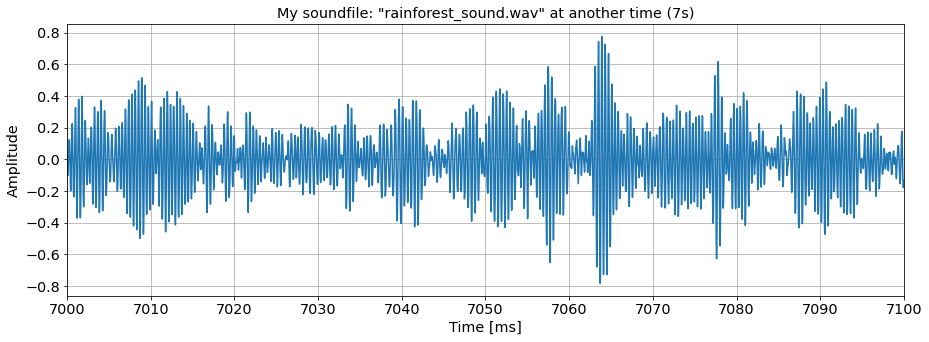

In [6]:
start2 = sample_rate * 7
end2 = int(start2 + sample_rate/10)
print(start2, end2)

samples_100ms_2 = samples[start2:end2]

y_2 = [samples_100ms_2[i]/10000.0 for i in range(len(samples_100ms_2))]
plt.plot(y_2)

x2_values = [sample_rate/100*i for i in range(11)]
x2_labels = [7000+(10*i) for i in range(11)]
plt.xticks(x2_values, x2_labels)
plt.xlim(0, sample_rate/10)

plt.title('My soundfile: "rainforest_sound.wav" at another time (7s)')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.grid()

3. For each of the segments you looked at above, window them, and compute their Fourier transforms. Plot their dB magnitude spectra. Appropriately label your axes with "Magnitude (dB)" and "Frequency (kHz)". The frequency axis **must be** in kiloHertz, and limited to 0 to the Nyquist frequency (half the sampling rate). Window the audio with 1) boxcar, or 2) Hann. (This means you will have create four plots in total , or two plots with two lines each.)

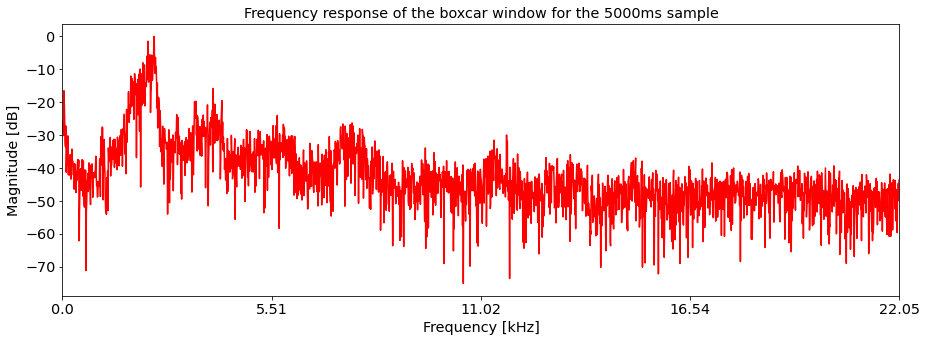

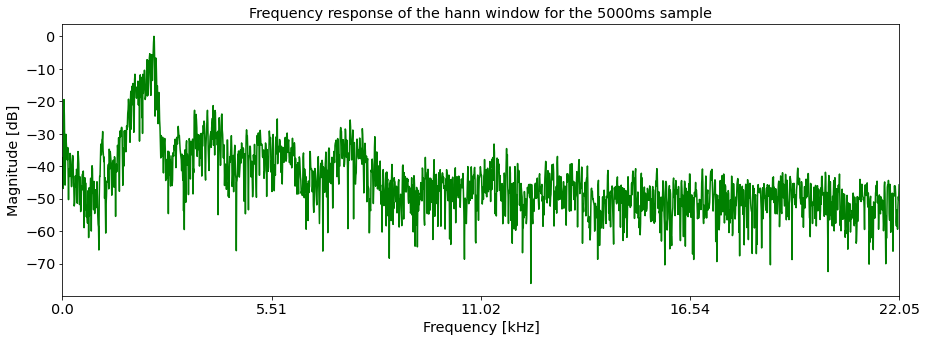

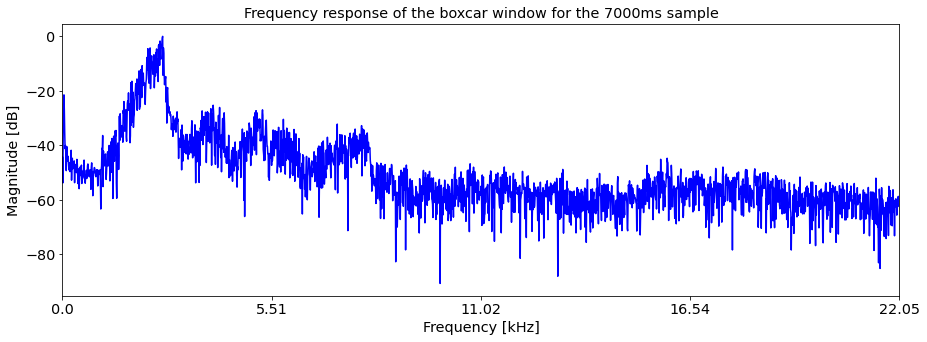

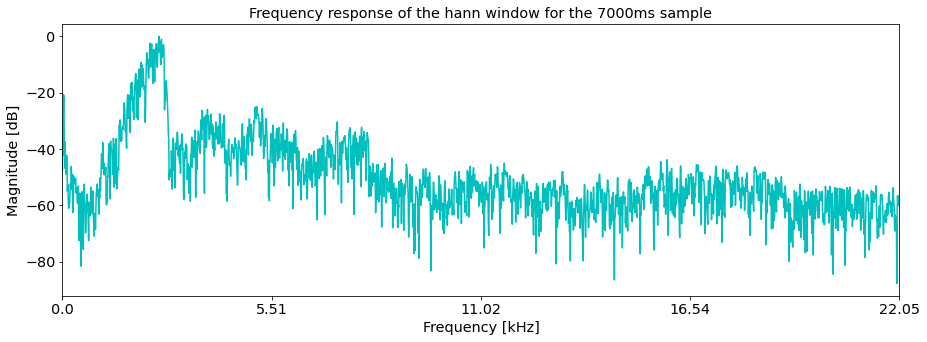

In [7]:
# add your code below
# Nyquist frequency 22050Hz 22.05kHz
# Window and then FFT
# Window had the same length of the signal for this case, because it was not stated otherwise
 
from scipy import signal
from scipy.fft import fft, fftshift, fftfreq

def fft_and_window(window_type, sig, sample_rate, text, color):
    window_len = len(sig)
    
    window = signal.windows.boxcar(window_len)
    
    if(window_type == "hann"):
        window = signal.windows.hann(window_len)
        
    windowed = sig * window
    yf = np.abs(fft(windowed))[0:window_len//2] 
    response = 20 * np.log10(yf/yf.max())
    xf = fftfreq(window_len, 1/sample_rate)[:window_len//2]
    
    plt.figure()
    plt.plot(xf, response, color)

    xf_values = np.linspace(0, 22050, 5)
    xf_labels = np.round(np.linspace(0, 22050, 5)/1000, 2)
    
    plt.xticks(xf_values, xf_labels)
    plt.xlim(0, sample_rate/2)
    plt.title("Frequency response of the "+ window_type + " window for the " + text + " sample")
    plt.ylabel("Magnitude [dB]")
    plt.xlabel("Frequency [kHz]")
    

# 5000ms segment
fft_and_window("boxcar", y_1, sample_rate, "5000ms", 'r')
fft_and_window("hann", y_1, sample_rate, "5000ms", 'g')

# 7000ms segment
fft_and_window("boxcar", y_2, sample_rate, "7000ms", 'b')
fft_and_window("hann", y_2, sample_rate, "7000ms", 'c')

4. For the first 10 seconds of your audio file, compute and plot its dB magnitude short-time Fourier transform using a Hann window of duration 25 ms with a window hopsize of 10 ms, and an FFT size of 8192 samples. Do the same using a Hann window of duration 100 ms with a window hopsize of 10 ms. Appropriately label your axes with "Frequency (kHz)" and "Time (s)". The frequency axis must be in kiloHertz, and limited to 0 to 5 kHz. The time axis must be in seconds. Choose a colormap that you feel describes your personality (https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html). See [scipy.signal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html) for help.

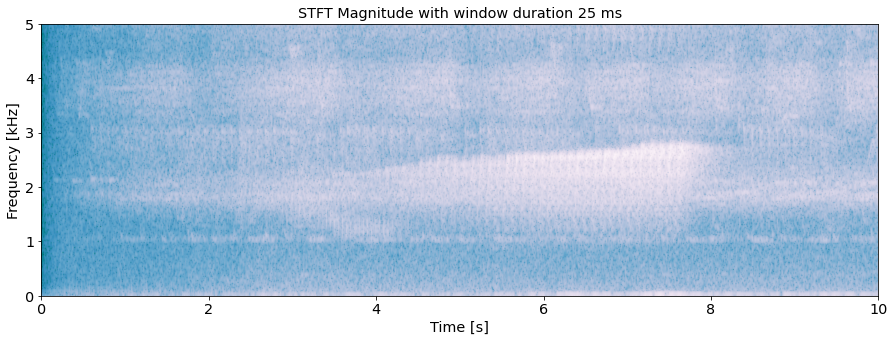

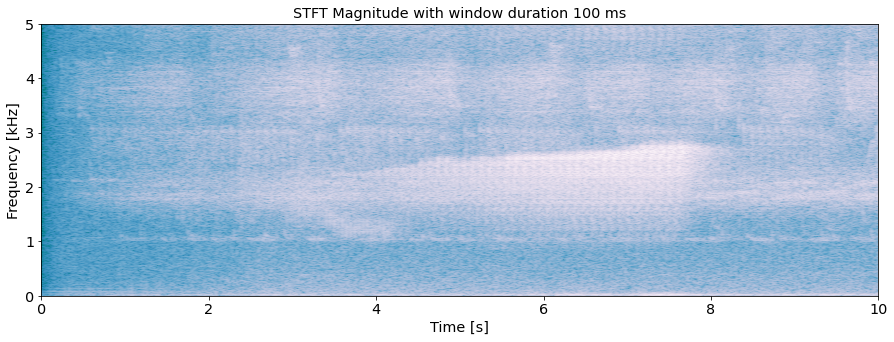

In [8]:
# add your code below
def stft_and_window(sig, fs, duration_ms, hopsize_ms, size_fft=8192):
    duration = int(duration_ms*fs*1e-3)
    hopsize = int(hopsize_ms*fs*1e-3)

    # STFT. Hann window by default
    f, t, Zxx = signal.stft(sig, fs, nperseg=duration, noverlap=duration-hopsize, nfft=size_fft)
    response = 20 * np.log10(np.abs(Zxx)/np.abs(Zxx).max())

    plt.figure()
    plt.pcolormesh(t, f/1000.0, np.abs(response),cmap='PuBuGn', shading='gouraud')
    plt.ylim(0, 5.0)
    plt.title(f'STFT Magnitude with window duration {duration_ms} ms')
    plt.ylabel('Frequency [kHz]')
    plt.xlabel('Time [s]')
    plt.show()

stft_and_window(samples_10_seconds, sample_rate, 25, 10)
stft_and_window(samples_10_seconds, sample_rate, 100, 10)

5. Describe some of the advantages and nackdelar of using short or long time windows for time-frequency analysis.

Answer: Short time windows capture instant features so they are more accurate on a short time term, in other words, they have good temporal resolution. However, they have less accurate information in frequency domain, which in common words is said to have poor frequency resolution.
Long windows have better frequency resolution, but they also have worse resolution in time, so the spectrogram with longer windows looks more "blurry" in time.

6. For the first 10 seconds of your audio file, use the [librosa package](https://github.com/librosa) to compute its Mel spectrogram using Hann windows of duration 25 ms with a window hopsize of 10 ms. Use 128 Mel bands and an FFT size of 8192 samples. Display the dB magnitude with reference to the max power observed, and limit your y-axis between 0 and 5 kHz. Use the same colormap as you used above. See https://github.com/librosa/librosa/blob/main/examples/LibROSA%20demo.ipynb for help. 

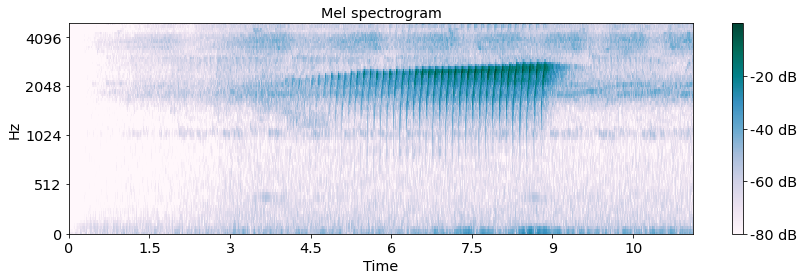

In [9]:
import librosa
import librosa.display

# add your code below
window_len = int(sample_rate * 0.025) #Hann windows of duration 25 ms
hopsize_len = int(sample_rate * 0.01) #window hopsize of 10 ms

libaudio, _ = librosa.load("rainforest_sound.wav", sr=sample_rate)
libaudio_10_seconds = libaudio[:number_samples]

#Getting the spectogram
S = librosa.feature.melspectrogram(libaudio_10_seconds, sr=sample_rate, n_mels=128, n_fft=8192,
    hop_length=hopsize_len,
    win_length=window_len,
    window="hann", power=2.0)

log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12,4))

librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel',cmap='PuBuGn')

plt.ylim(0, 5000)

plt.title('Mel spectrogram')

plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

# Part 2: Extracting features

1. Write a function that will take in the samples of an audio file, a frame size in samples, a frame hop size in samples, and compute and return the number of waveform zero crossings in each frame. A waveform x[n] undergoes a zero crossing when sign(x[n]) and sign(x[n+1]) are different. You will have to slice x[n] into chunks of a specified size, and for each of those chunks, count the number of sign changes.

In [10]:
# add your code below
def extract0(samples, sample_rate, frame_size, hop_size):
    import math
    frame_size = int(frame_size*sample_rate*1e-3)
    hop_size = int(hop_size*frame_size)
    frame_number = (len(samples)-frame_size)//hop_size

    zero_crossings = []
    
    for i in range(frame_number):
        previous = samples[0]
        zcrossing = 0
        for sample in samples[i*hop_size+1: i*hop_size+frame_size]:
            if np.sign(previous) != np.sign(sample): zcrossing += 1
        zero_crossings.append(zcrossing)

    return zero_crossings

2. Using your function, compute zero crossings of 46 ms frames hopped 50% of that for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of zero crossings you extracted.

(0.0, 10.0)

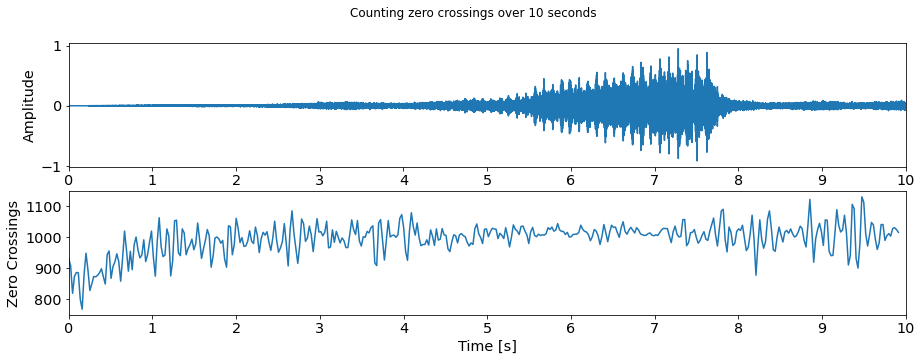

In [11]:
# add your code below
frame_size = 46
hopping = 0.5 # 50% of frame size
zero_crossings = extract0(samples_10_seconds, sample_rate, frame_size, hopping)

fig, axs = plt.subplots(2)
fig.suptitle('Counting zero crossings over 10 seconds')

# subplot: waveform
y = [samples_10_seconds[i]/10000.0 for i in range(len(samples_10_seconds))]
xticks = [sample_rate*i for i in range(11)]
axs[0].plot(y)
# axs[0].set_title('Time domain waveform in 10 seconds')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Amplitude')
axs[0].set_xticks(xticks)
axs[0].set_xticklabels([i for i in range(11)])
axs[0].set_xlim([0, 10*sample_rate])
# subplot: zero crossings with framing
# time [ms] corresponding to num zero crossings (take the start of a frame):
time = [ round( 1e-3* i* (1-hopping)*frame_size, 3 ) for i in range(len(zero_crossings)) ]
axs[1].plot(time, zero_crossings)
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Zero Crossings')
axs[1].set_xticks([i for i in range(11)])
axs[1].set_xlim([0, 10])

3. Write a function that will take in the samples of an audio file, a frame size in samples, a hop size in samples, and a sampling rate, and compute and return the spectral centroid of each frame. The spectral centroid of a rectangular window of audio $x[n]$ of length $N$ (even) is defined as 
$$ R_{0.5}(x) = \frac{\sum_{k=0}^{N/2+1} \frac{F_s k}{N} |X[k]|}{\sum_{k=0}^{N/2+1} |X[k]|} $$
where $X[k]$ is the DFT of $x[n]$, and $F_s$ is the sampling rate.

In [12]:
# add your code below
def extractSpectralCentroid(samples, sample_rate, frame_size, hop_size):
    import math
    frame_size = int(frame_size*sample_rate*1e-3) #convert from ms to number of samples
    hop_size = int(hop_size*frame_size) #hop size into number of samples
    frame_number = (len(samples)-frame_size)//hop_size #number of frames
    spectral_centroids = []
    
    for i in range(frame_number):
        current_frame = samples[i*hop_size: i*hop_size+frame_size]
        N = len(current_frame)
        fft_frame = np.abs(fft(current_frame))[0:((N//2)+1)]
        numerator_factors = []
        for k in range(len(fft_frame)):
            numerator_factors.append((sample_rate*k*fft_frame[k])//N)
            
        numerator = np.sum(numerator_factors)
        denominator = np.sum(fft_frame)
        
        spectral_centroids.append(numerator//denominator)
        

    return spectral_centroids

4. Using your function, compute spectral centroid features for contiguous 46 ms frames hopped 50% for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of spectral centroids you extracted.

(0.0, 10.0)

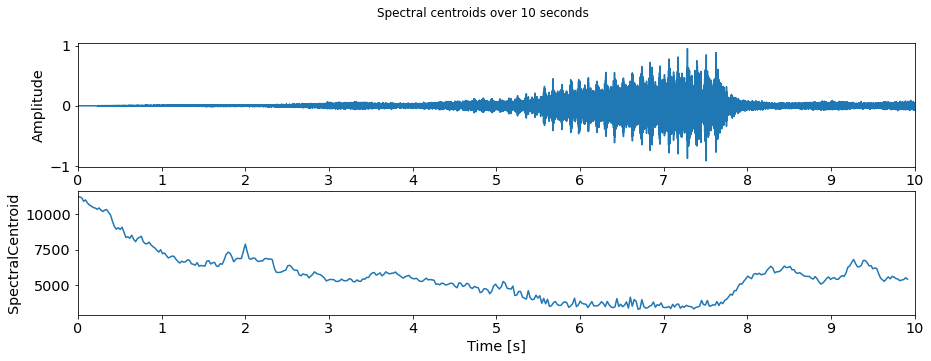

In [13]:
# add your code below
spectral_centroids = extractSpectralCentroid(samples_10_seconds, sample_rate, frame_size, hopping)

fig_, ax = plt.subplots(2)
fig_.suptitle('Spectral centroids over 10 seconds')

# subplot: waveform
y = [samples_10_seconds[i]/10000.0 for i in range(len(samples_10_seconds))]
xticks = [sample_rate*i for i in range(11)]
ax[0].plot(y)
# ax[0].set_title('Time domain waveform in 10 seconds')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude')
ax[0].set_xticks(xticks)
ax[0].set_xticklabels([i for i in range(11)])
ax[0].set_xlim([0, 10*sample_rate])
# subplot: spectral centroids with framing
time = [ round( 1e-3* i* (1-hopping)*frame_size, 3 ) for i in range(len(spectral_centroids)) ]
ax[1].plot(time, spectral_centroids)
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('SpectralCentroid')
ax[1].set_xticks([i for i in range(11)])
ax[1].set_xlim([0, 10])

5. Using the librosa package (https://github.com/librosa), extract the first 10 MFCC features from your audio file using Hann windows of 25 ms duration and 10 ms hop size, and an FFT size of 8192 samples. Display the extracted MFCCs for the first 10 seconds.

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

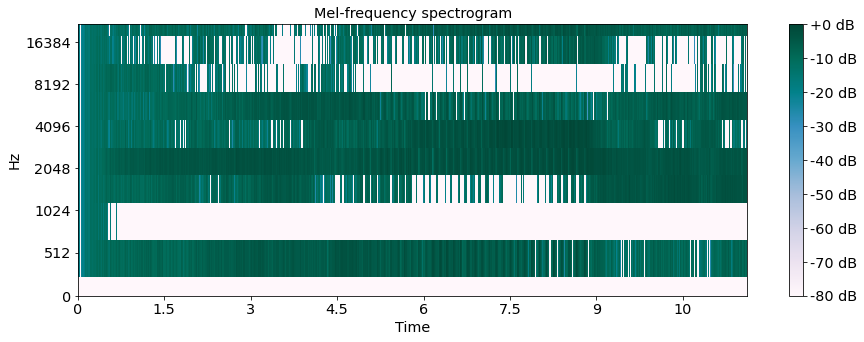

In [14]:
# add your code below
window_len = int(sample_rate * 0.025) #Hann windows of duration 25 ms
hopsize_len = int(sample_rate * 0.01) #window hopsize of 10 ms


mfccc = librosa.feature.mfcc(y=libaudio_10_seconds, sr=sample_rate, n_mfcc=10, n_fft=8192,
            hop_length=hopsize_len,
            win_length=window_len,
            window="hann")

fig, axe = plt.subplots()

mfccc_dB = librosa.power_to_db(mfccc, ref=np.max)

img = librosa.display.specshow(mfccc_dB, x_axis='time',
                         y_axis='mel', sr=sample_rate,
                         ax=axe, cmap='PuBuGn')
fig.colorbar(img, ax=axe, format='%+2.0f dB')
axe.set(title='Mel-frequency spectrogram')